In [1]:
import numpy as np
import pandas as pd
import spacy
import re
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as snb
from wordcloud import WordCloud, STOPWORDS
import math
from scipy.stats import chi2_contingency, chisquare, chi2
import nltk  
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.probability import FreqDist
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.model_selection import GridSearchCV
import tensorflow as tf

In [2]:
trump_df = pd.read_csv('joe_tweet_senti.csv', lineterminator='\n')

In [3]:
trump_df

,created_at,tweet,likes,retweet_count,source,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,lang,Polarity,Subjectivity,Sentiment\r
0,2020-10-15 00:00:20,"['biden', 'made', 'trumpisnotamerica']",0.0,0.0,Twitter Web App,1536.0,Golden Valley Arizona,46.304036,-109.171431,NaN,United States of America,North America,Montana,MT,ENGLISH,0.000000,0.000000,0.0
1,2020-10-15 00:00:21,"['watching', 'setting', 'dvr', 'lets', 'give',...",0.0,0.0,Twitter for iPhone,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ENGLISH,0.000000,0.000000,0.0
2,2020-10-15 00:00:22,"['censorship', 'hunterbiden', 'biden', 'bidene...",1.0,0.0,Twitter Web App,390.0,"California, USA",36.701463,-118.755997,NaN,United States of America,North America,California,CA,ENGLISH,0.000000,0.000000,0.0
3,2020-10-15 00:00:23,"['wrong', 'cory', 'bookers', 'brilliant', 'fin...",0.0,0.0,Twitter Web App,4622.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ENGLISH,0.133333,0.966667,1.0
4,2020-10-15 00:00:25,"['2020', 'nypost', 'censorship', 'censored', '...",0.0,0.0,Twitter for iPhone,1397.0,"Chicago, Illinois",41.875562,-87.624421,Chicago,United States of America,North America,Illinois,IL,ENGLISH,-0.148810,0.678571,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526882,2020-11-08 23:59:06,"['biden', 'camps', 'announcement', 'idlib', 'm...",1.0,0.0,Twitter Web App,3019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ENGLISH,-0.500000,0.500000,-1.0
526883,2020-11-08 23:59:16,"['mr', 'biden', 'tear', 'wall', 'mexico', 'wha...",1.0,0.0,Twitter for iPhone,444.0,"Auckland, NZ",-36.852095,174.763180,Auckland,New Zealand,Oceania,Auckland,AUK,ENGLISH,0.311111,0.611111,1.0
526884,2020-11-08 23:59:32,"['nyt', 'beratalbayraks', 'departure', 'may', ...",3.0,0.0,Twitter for iPhone,14770.0,London/ Istanbul/Izmir /Beirut,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ENGLISH,0.000000,0.000000,0.0
526885,2020-11-08 23:59:33,"['thank', 'support', 'hard', 'work', 'biden', ...",2.0,1.0,Twitter for Android,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ENGLISH,-0.291667,0.541667,-1.0


In [4]:
reviews1 = trump_df[trump_df['Polarity'] == 0.0000]
reviews1.shape

(224146, 18)

neutral statements are of size 277706.which is quite large, we will drop them all

In [5]:
cond1=trump_df['Polarity'].isin(reviews1['Polarity'])
trump_df.drop(trump_df[cond1].index, inplace = True)
trump_df.shape

(302741, 18)

In [6]:
X = trump_df["tweet"]
Y = trump_df["Sentiment\r"]

In [7]:
vectorizer = TfidfVectorizer()
X_tfid = vectorizer.fit_transform(X)

In [8]:
X_tfid_train, X_tfid_test, Y_tfid_train, Y_tfid_test = train_test_split(X_tfid, Y, test_size=0.33)

In [13]:
params = {'alpha': [0.01, 0.1, 0.3, 0.5, 1.0, 10.0],}
nb = MultinomialNB()
with tf.device('/GPU:0'):
    #logist=LogisticRegression()
    nb_cv=GridSearchCV(nb,param_grid=params,cv=5)
    nb_cv.fit(X_tfid_train,Y_tfid_train)

    print("tuned hpyerparameters :(best parameters) ",nb_cv.best_params_)
    print("accuracy :",nb_cv.best_score_)
    y_nb_pred = nb_cv.predict(X_tfid_test)
    print(classification_report(Y_tfid_test, y_nb_pred))

tuned hpyerparameters :(best parameters)  {'alpha': 0.1}
accuracy : 0.8233548319170122
              precision    recall  f1-score   support

        -1.0       0.81      0.55      0.66     29980
         1.0       0.83      0.95      0.88     69925

    accuracy                           0.83     99905
   macro avg       0.82      0.75      0.77     99905
weighted avg       0.83      0.83      0.82     99905



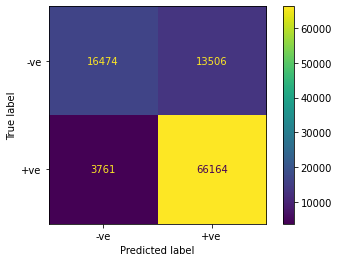

In [10]:
test_matrix = metrics.confusion_matrix(Y_tfid_test, y_nb_pred)
disp1 = ConfusionMatrixDisplay(confusion_matrix=test_matrix, display_labels=["-ve","+ve"])
disp1.plot() 

In [11]:
with tf.device('/GPU:0'):
    Y_pred = nb_cv.predict(X_tfid)
    print(classification_report(Y, Y_pred))

              precision    recall  f1-score   support

        -1.0       0.91      0.65      0.76     91119
         1.0       0.87      0.97      0.92    211622

    accuracy                           0.87    302741
   macro avg       0.89      0.81      0.84    302741
weighted avg       0.88      0.87      0.87    302741



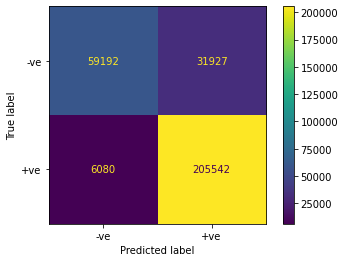

In [12]:
pred_matrix = metrics.confusion_matrix(Y, Y_pred)
disp2 = ConfusionMatrixDisplay(confusion_matrix=pred_matrix, display_labels=["-ve","+ve"])
disp2.plot() 